In [1]:
import ProcessDataset as prd
import matplotlib.pyplot as plt
from tensorflow import keras
import LSTMAE_KERAS
import numpy as np
import pandas as pd

In [2]:
window_size = 8
number_of_features = 1

original_dataset_filepath = "C:/Users/inhom/School/2024_1/2023연구재현/제일/101_1011_jeil.csv"
normal_dataset_filepath = "제일/chosenPatternJeil.csv"

original_df = prd.load_data(original_dataset_filepath, scale = True, include_deforst = False)
normal_df = prd.load_data(normal_dataset_filepath, scale = True, include_deforst = False)

original_X, original_Y = prd.create_dataset(original_df, shuffle = False, window_size = window_size, number_of_features = number_of_features)

train, valid, test = prd.train_test_split(normal_df, train_ratio = 0.6, valid_ratio = 0.75)
train_X, train_Y = prd.create_dataset(train, shuffle = False, window_size = window_size, number_of_features = number_of_features)
valid_X, valid_Y = prd.create_dataset(valid, shuffle = False, window_size = window_size, number_of_features = number_of_features)
test_X, test_Y = prd.create_dataset(test, shuffle = False, window_size = window_size, number_of_features = number_of_features)


In [4]:
model = LSTMAE_KERAS.get_model(window_size = window_size, number_of_features = number_of_features)
LSTMAE_KERAS.print_summary(model)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 8, 64)             16896     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 16)                528       
                                                                 
 repeat_vector (RepeatVector  (None, 8, 16)            0         
 )                                                               
                                                                 
 lstm_2 (LSTM)               (None, 8, 32)             6272      
                                                                 
 lstm_3 (LSTM)               (None, 8, 64)             24832     
                                                        

In [5]:
history = LSTMAE_KERAS.train(model, train_X = train_X, valid_X = valid_X, set_epochs = 5)

Epoch 1/5
369/369 [==============================] - 13s 15ms/step - loss: 0.0347 - mae: 0.0347 - val_loss: 0.0160 - val_mae: 0.0160
Epoch 2/5
369/369 [==============================] - 5s 13ms/step - loss: 0.0152 - mae: 0.0152 - val_loss: 0.0119 - val_mae: 0.0119
Epoch 3/5
369/369 [==============================] - 5s 12ms/step - loss: 0.0138 - mae: 0.0138 - val_loss: 0.0114 - val_mae: 0.0114
Epoch 4/5
369/369 [==============================] - 5s 13ms/step - loss: 0.0133 - mae: 0.0133 - val_loss: 0.0116 - val_mae: 0.0116
Epoch 5/5
369/369 [==============================] - 5s 13ms/step - loss: 0.0125 - mae: 0.0125 - val_loss: 0.0079 - val_mae: 0.0079


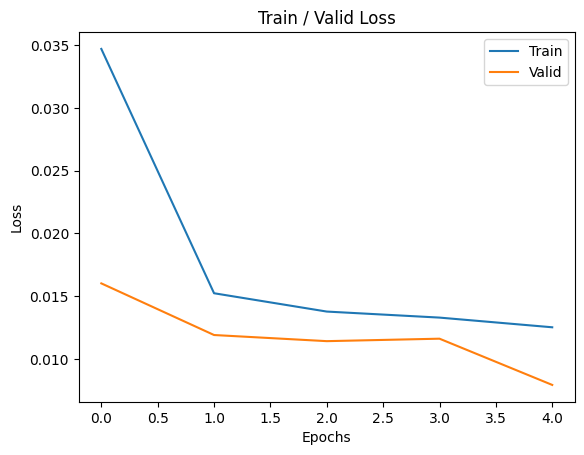

In [6]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Train / Valid Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Valid'])
plt.show()

In [6]:
model.save('LSTMAEver14.h5')

In [21]:
trained_model = keras.models.load_model('LSTMAEver13.h5')

In [22]:
trained_model.evaluate(test_X, test_X)

364/364 [==============================] - 2s 4ms/step - loss: 0.0017 - mae: 0.0017


[0.0017414679750800133, 0.0017414679750800133]

In [27]:
def predictLSTMAE(model, data):
	num_sample = 4000
	result = []
	batch_slice = np.arange(window_size, num_sample, window_size)

	for i in batch_slice:
		batch_data = data[i:i+window_size]
		batch_predictions = model.predict(batch_data)
		result.extend(batch_predictions)
	
	result = np.array(result)
	result = result[:,0,0]
	nan_array = np.full((window_size,), np.nan)
	result = np.hstack((nan_array, result))
	return result

In [28]:
predicted_value = predictLSTMAE(trained_model, original_X)

In [29]:
len(predicted_value)

4000

In [12]:
train_X[:3992,0,0]

array([0.02966102, 0.03389831, 0.05084746, ..., 0.13135593, 0.08474576,
       0.08474576])

In [13]:
predicted_value[:3990]

array([0.07282081, 0.07702237, 0.08093598, ..., 0.6042996 , 0.6258454 ,
       0.67688066], dtype=float32)

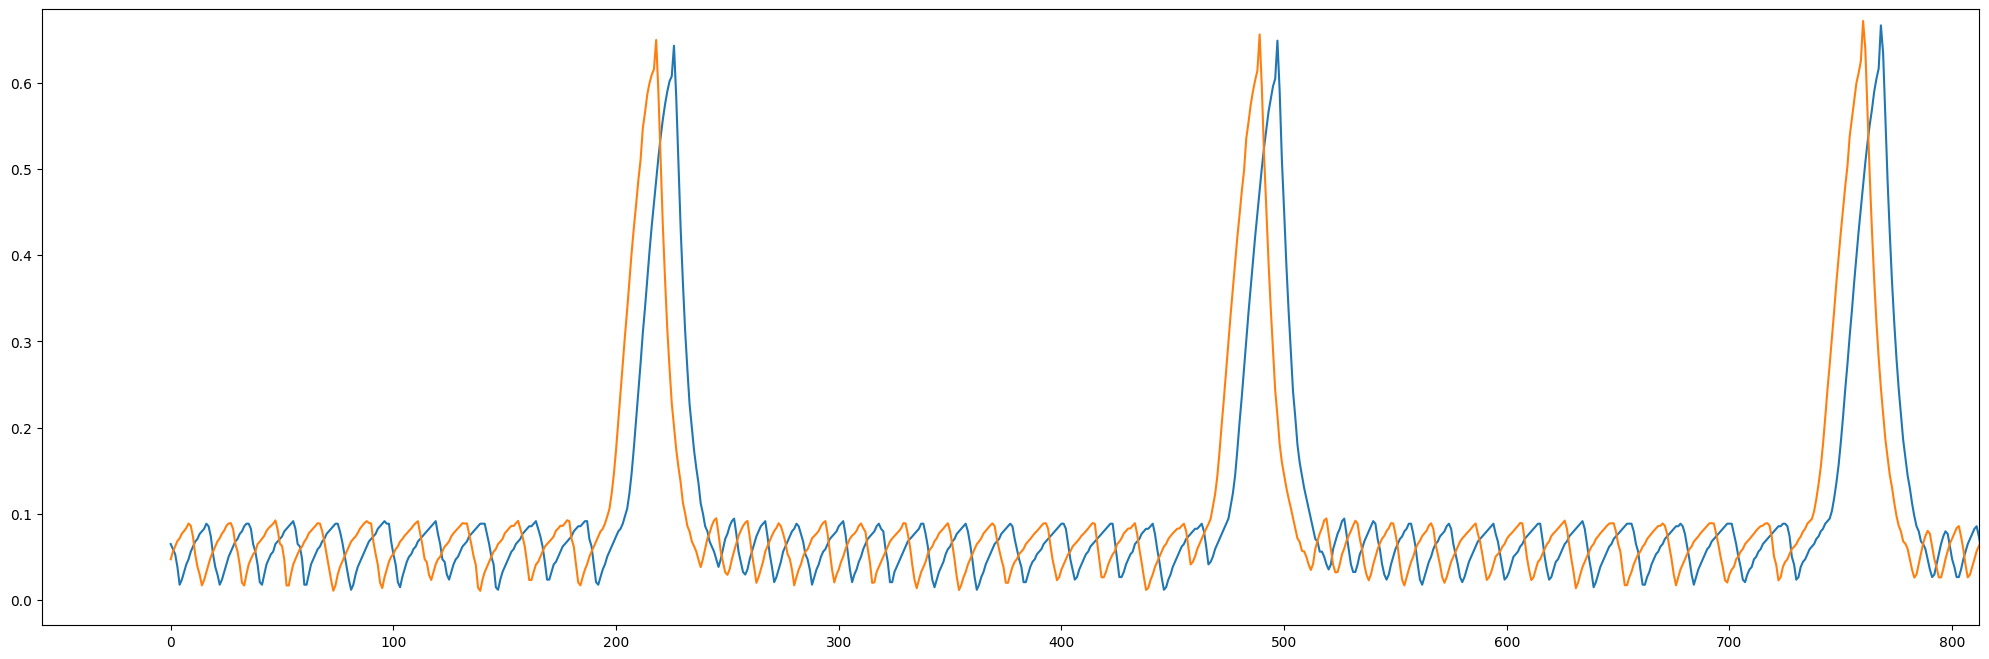

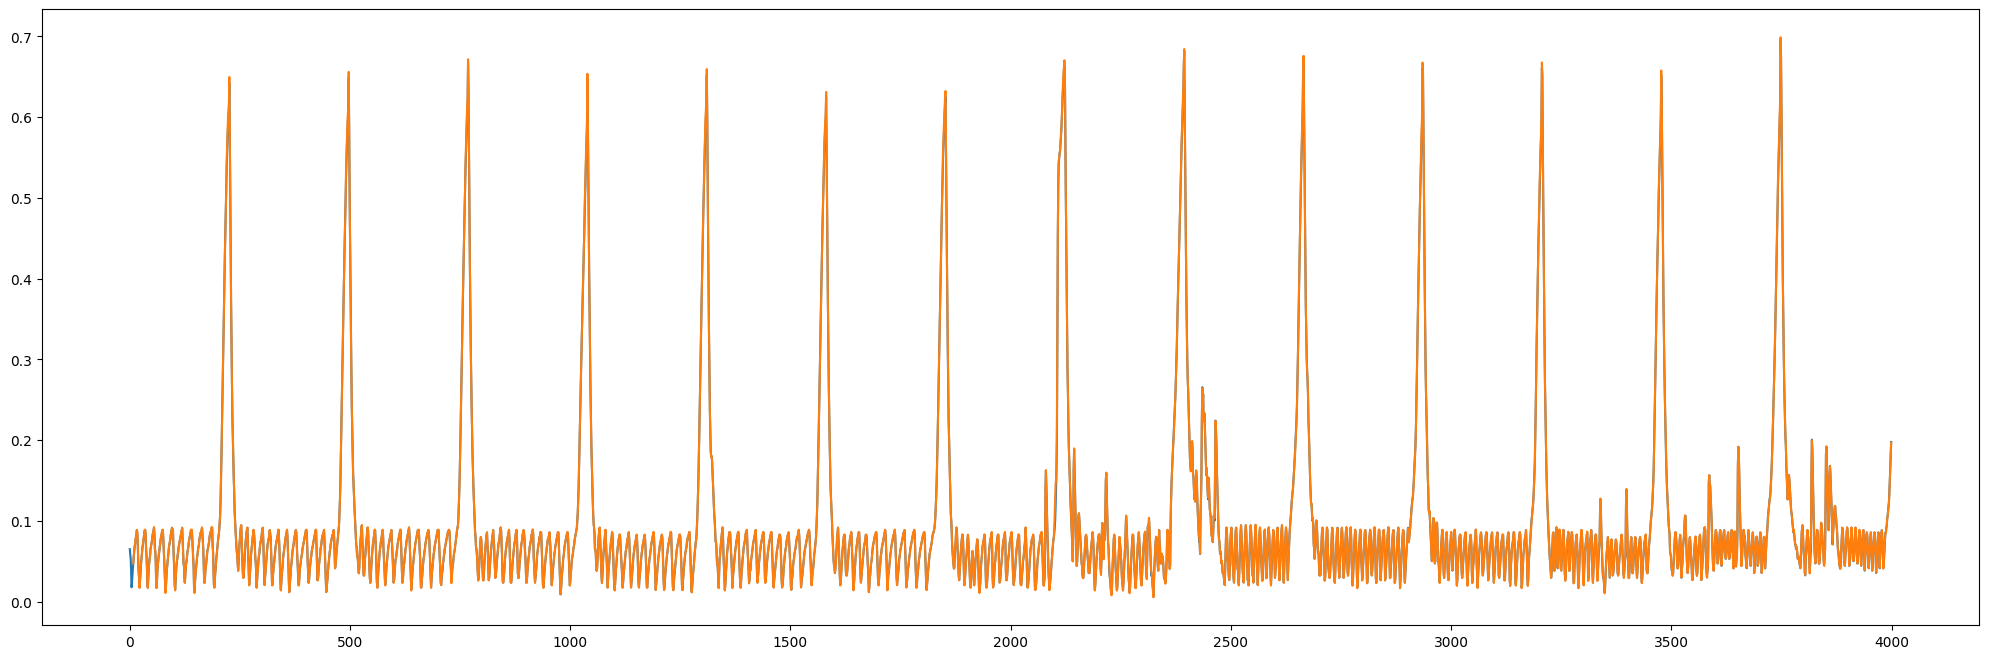

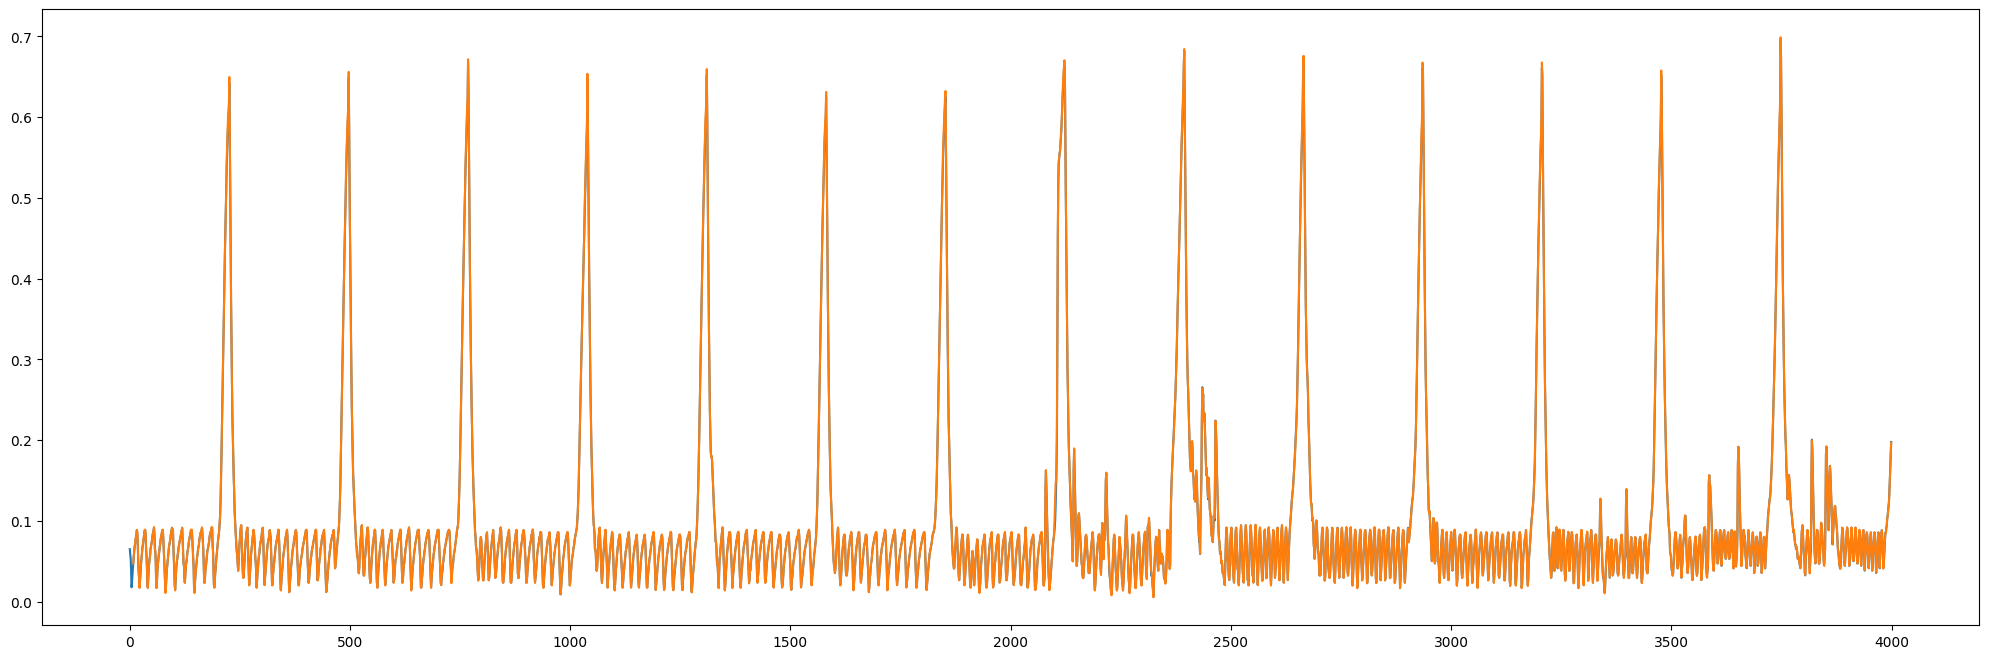

In [31]:
%matplotlib inline
plt.figure(figsize=(25,8))
plt.plot(np.arange(4000), original_X[:4000,0,0])
plt.plot(np.arange(4000), predicted_value[:4000])
plt.show()